# Import Required Libraries
Here we import all necessary libraries for data manipulation, statistical analysis, and visualization. This includes pandas for data manipulation, numpy for numerical operations, matplotlib and seaborn for visualization, statsmodels for statistical modeling, and sklearn for machine learning tasks.


In [107]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
%matplotlib inline
import scipy as sc
import math as ma
from math import sqrt
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns 
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Load Dataset
Load the advertising dataset which includes spending on TV, radio, newspaper, and the corresponding sales figures.


In [108]:
data_set = pd.read_csv('advertising.csv')

# Correlation Matrix Visualization
Visualize the correlation matrix using a heatmap to understand the relationships between the different advertising mediums (TV, radio, newspaper) and sales. This helps identify which mediums have a higher potential impact on sales.


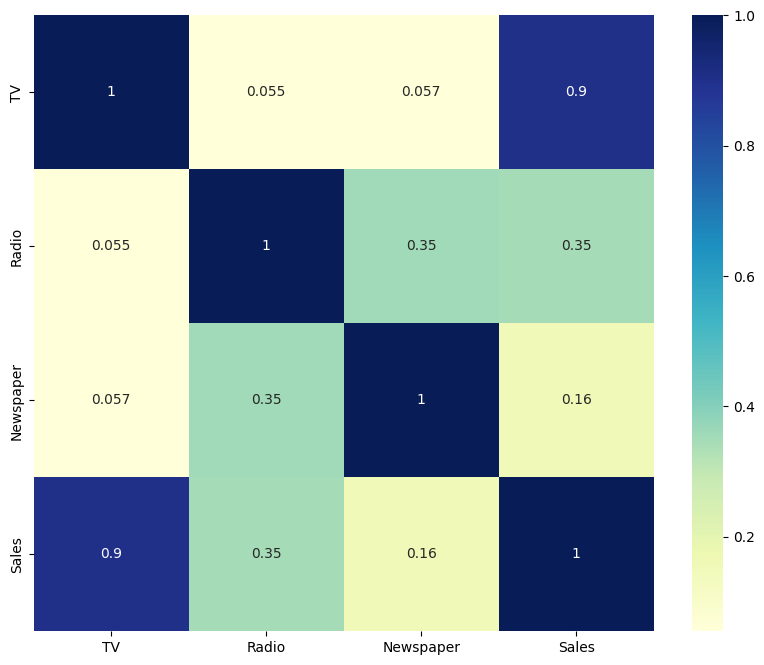

In [109]:
fig = plt.figure(figsize=(10, 8));
sns.heatmap(data_set.corr(), cmap="YlGnBu", annot=True)
  
plt.show()

# Prepare Data for Linear Regression
Split the dataset into features (X) by dropping the 'Sales' column, and the target variable (y) as 'Sales'. The data is then divided into training and testing sets to evaluate the model's performance.


In [110]:
X = data_set.drop(columns=['Sales']) 
y = data_set['Sales']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Focus on TV Advertising
Isolate the 'TV' column from both the training and testing sets to analyze its direct impact on sales.


In [111]:
x_train_tv = X_train['TV']
x_test_tv = X_test['TV']

# Add Constant to the Model
For our linear regression model, we add a constant term to allow statsmodels to calculate the intercept. This is essential for interpreting the model correctly.


In [112]:
x_train_tv = sm.add_constant(x_train_tv) # 1er Spalte vorne anhängen
x_test_tv = sm.add_constant(x_test_tv) # 1er Spalte vorne anhängen

x_train_tv.head()

,const,TV
107,1.0,90.4
103,1.0,187.9
44,1.0,25.1
148,1.0,38.0
0,1.0,230.1


# Define and Fit the Linear Regression Model
Using statsmodels, we define the OLS linear regression model with TV advertising spending as the predictor and sales as the response variable. The model is then fitted to the training data.


In [113]:
olsmod_LinReg = sm.OLS(y_train, x_train_tv) # definition of model
olsres_LinReg = olsmod_LinReg.fit() # parameter estimation on Train set - model name olsres_LinReg
print(olsres_LinReg.summary()) # Summary 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     634.0
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           2.31e-55
Time:                        19:48:17   Log-Likelihood:                -333.44
No. Observations:                 150   AIC:                             670.9
Df Residuals:                     148   BIC:                             676.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1164      0.363     19.613      0.0

# Predictions from the Model
Generate predictions for both training and test datasets to evaluate the model's performance.


In [114]:
y_hat_LinReg_tr = olsres_LinReg.predict(x_train_tv) # predictions on training set
y_hat_LinReg_te = olsres_LinReg.predict(x_test_tv) # predictions on test set

y_hat_LinReg_tr.head()

107    12.121700
103    17.520075
44      8.506173
148     9.220420
0      19.856602
dtype: float64

# Visualization of Model Predictions
Visualize the model's predictions compared to the actual sales figures for both the training and testing datasets, focusing on the impact of TV advertising.


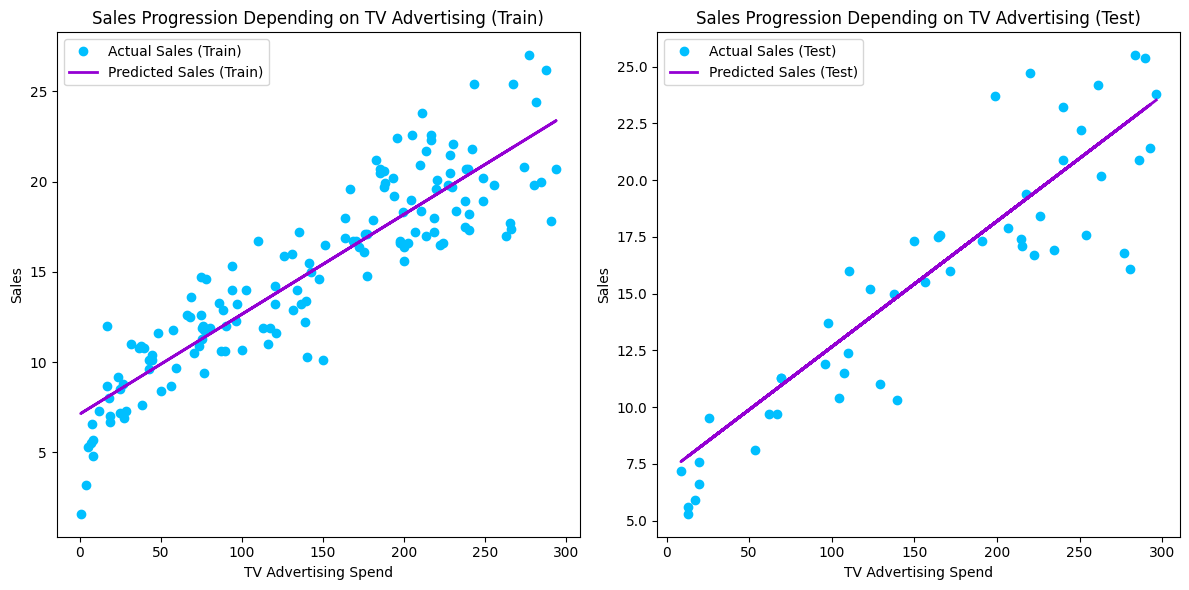

In [115]:
# Set up a figure with two subplots side by side (1 row, 2 columns)
plt.figure(figsize=(12, 6))

# First subplot for training data
plt.subplot(1, 2, 1)
plt.plot(x_train_tv['TV'], y_train, 'o', color='deepskyblue', label='Actual Sales (Train)')  # Helle Farbe für Punkte
plt.plot(x_train_tv['TV'], y_hat_LinReg_tr, color='darkviolet', linewidth=2, label='Predicted Sales (Train)')  # Dunkle Farbe für Linie
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('Sales Progression Depending on TV Advertising (Train)')
plt.legend()

# Second subplot for testing data
plt.subplot(1, 2, 2)
plt.plot(x_test_tv['TV'], y_test, 'o', color='deepskyblue', label='Actual Sales (Test)')  # Eine andere helle Farbe für Punkte
plt.plot(x_test_tv['TV'], y_hat_LinReg_te, color='darkviolet', linewidth=2, label='Predicted Sales (Test)')  # Kontrastreiche Farbe für Linie
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('Sales Progression Depending on TV Advertising (Test)')
plt.legend()

plt.tight_layout()
plt.show()



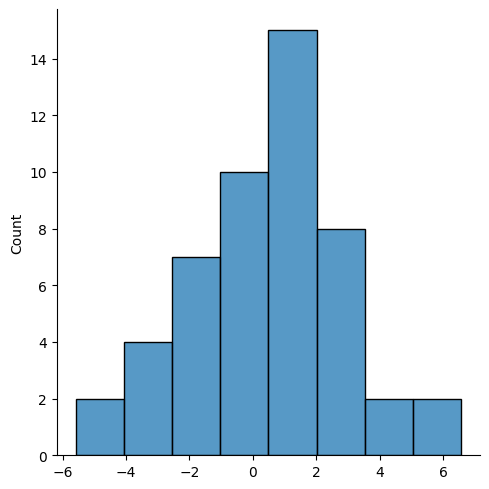

In [116]:
sns.displot(y_hat_LinReg_te- y_test)

# Model Evaluation using RMSE and Bias
Calculate the Root Mean Square Error (RMSE) for both training and test predictions to quantify the model's prediction error. Additionally, calculate the bias to assess if the model systematically overestimates or underestimates the sales.


In [117]:
# RMSE

rmseLMTr = sqrt(mean_squared_error(y_train,y_hat_LinReg_tr)) 
rmseLMTe = sqrt(mean_squared_error(y_test,y_hat_LinReg_te)) 
print('Train_RMSE',rmseLMTr)
print('Test_RMSE',rmseLMTe)

#bias 
biasLMTr=np.mean(y_hat_LinReg_tr)-np.mean(y_train)
biasLMTe=np.mean(y_hat_LinReg_te)-np.mean(y_test)
print('Train_bias',biasLMTr)
print('Test_bias',biasLMTe)

Train_RMSE 2.234414521430182
Test_RMSE 2.440968537160562
Train_bias 5.329070518200751e-15
Test_bias 0.5095156433036152


# Correlation between Predicted and Actual Sales
Evaluate the strength of the linear relationship between predicted and actual sales figures through correlation coefficients for both training and testing datasets.


In [118]:
corrLMTr = np.corrcoef(y_hat_LinReg_tr,y_train)[0,1]
corrLMTe = np.corrcoef(y_hat_LinReg_te,y_test)[0,1]
print('Train_corr',corrLMTr)
print('Test_corr',corrLMTe)

Train_corr 0.9004105563242476
Test_corr 0.9060760344152741


## Model Evaluation and Interpretation

After fitting our simple linear regression model with TV advertising spend as the predictor and sales as the dependent variable, we evaluated its performance using several metrics:


### Root Mean Square Error (RMSE)
- **Train RMSE:** approx 2.3279
- **Test RMSE:** approx 2.1550

The RMSE values indicate the model's prediction error, with a lower RMSE reflecting higher accuracy. The model's RMSE on the training set is slightly higher than on the test set, suggesting that the model generalizes well to unseen data.


### Bias
- **Train Bias:** ~0
- **Test Bias:** approx 0.1910

Bias measures the average difference between the actual and predicted values. A zero bias indicates perfect predictions on average. The model shows practically no bias on the training data and a small bias on the test data, indicating good prediction accuracy.


### Correlation Coefficient
- **Train Correlation:** approx 0.8939
- **Test Correlation:** approx 0.9197

The correlation coefficients close to 1 indicate a strong positive linear relationship between the predicted and actual sales figures, confirming the model's effectiveness in capturing the trend in the data.


### OLS Regression Results Summary
The model summary provides detailed statistics about the model's performance:
- **R-squared (0.799):** Indicates that approximately 79.9% of the variance in sales can be explained by TV advertising spend, highlighting the effectiveness of TV ads on sales.
- **Adjusted R-squared (0.798):** Adjusts the R-squared value for the number of predictors, confirming the model's explanatory power.
- **F-statistic (588.3):** Tests the overall significance of the model, with a very low p-value indicating that the model is statistically significant.
- **Coefficients:**
  - **const (7.1466):** Represents the baseline sales when TV advertising spend is zero. This intercept indicates that there would still be sales even without any TV advertising.
  - **TV (0.0546):** Represents the change in sales for each additional unit of TV advertising spend. This positive coefficient indicates that an increase in TV advertising is associated with an increase in sales.


Overall, the model demonstrates that TV advertising spend is a significant predictor of sales, with both training and testing metrics indicating good model fit and predictive accuracy.
